# Sales Analysis

In [1]:
import pandas as pd
import os
import calendar
import matplotlib.pyplot as plt

#### Merging the 12 months of sales data into a single CSV File 

In [2]:
# since we have a 12 csv files each contain the monthly sales we want to concatenate the files into one csv file 
# we have to find a way to read the 12 files in one step instead of reading each file on its own
####
# we can use the os.listdir that retrieve the names of all files in a directory
files = [files for files in os.listdir('Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    # we read each csv files and concatinating it to the previous 
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()
all_months_data.to_csv('all_data.csv', index=False)

#### Read in updated Dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')


#### Cleaning Data

In [4]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
all_data.dropna(subset=['Order ID'], inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


There are some rows that has the columns names so we should delete them

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### <span style="color:lightblue">Converting Columns to numeric</span>


In [8]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3460758740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3460758740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype('float64')


#### Adding Columns 

Adding Month colmun

In [9]:
all_data['Month'] = [i[0:2] for i in all_data['Order Date']]
# all_data['Month'] = all_data['Month'].astype('int32')
# all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])
# all_data

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3729549558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = [i[0:2] for i in all_data['Order Date']]


#### Converting Order Date to Date format

In [10]:
# converting order date to date formate 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3547021768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


#### Adding Sales per Order Column

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# Changing the position of the column
cols = list(all_data.columns)
cols
cols.remove('Sales')
all_data = all_data[cols[:4]+ ['Sales'] + cols[4:]]
all_data

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\2320704696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09


#### Adding City Column

In [12]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data['City'] = all_data['Purchase Address'].str.extract(',(.*?),').fillna('')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
cols = list(all_data.columns)
cols
cols.remove('City')
all_data = all_data[cols[:7]+ ['City'] + cols[7:]]

In [13]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,04
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,04
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,04
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,09
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,09
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco CA,09
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco CA,09


### Question 1 What was the best months for sales ? How much was earned that month ?

In [14]:
months_sales = all_data.groupby('Month').sum()
#months_sales = months_sales.sort_values(by='Sales', ascending=False)
months_sales

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\1993228980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months_sales = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


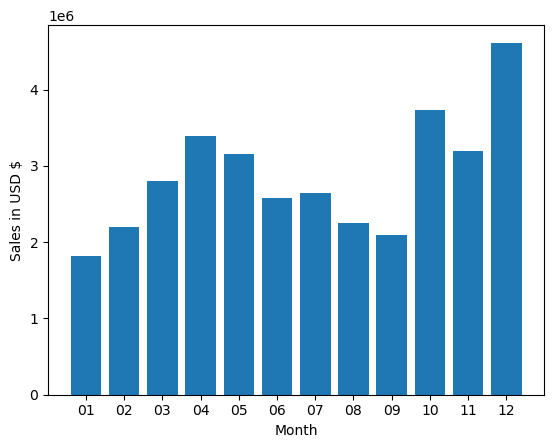

In [15]:
plt.bar(months_sales.index, months_sales['Sales'])
plt.ylabel('Sales in USD $')
plt.xlabel('Month')
plt.show()

### Question 2 What city had the highest number of sales ?

In [16]:
city_sales = all_data.groupby('City').sum()
city_sales

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3751158867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_sales = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2779908.20,2795498.58
Austin TX,11153,1809873.61,1819581.75
Boston MA,22528,3637409.77,3661642.01
Dallas TX,16730,2752627.82,2767975.40
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Portland ME,2750,447189.25,449758.27
Portland OR,11303,1860558.22,1870732.34
San Francisco CA,50239,8211461.74,8262203.91


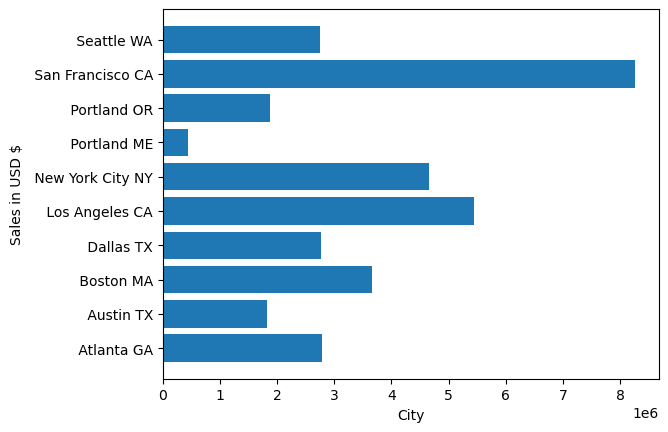

In [17]:
plt.barh(city_sales.index, city_sales['Sales'])
plt.ylabel('Sales in USD $')
plt.xlabel('City')
plt.show()

### َQuestion 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,04
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,04
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,04


In [19]:
# since we converted the column do date format we can easly retrieve the hour / day / month ...
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\1395034145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\1395034145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,04,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,04,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,04,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,09,20,56
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,09,16,0
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco CA,09,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco CA,09,17,30


In [20]:
hours = [hour for hour , df in all_data.groupby('Hour')]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [21]:
hours_sales = all_data.groupby('Hour')[['Sales','Quantity Ordered']].sum()
hours_sales

,Sales,Quantity Ordered
Hour,,
0,713721.27,4428
1,460866.88,2619
2,234851.44,1398
3,145757.89,928
4,162661.01,937
5,230679.82,1493
6,448113.00,2810
7,744854.12,4556
8,1192348.97,7002


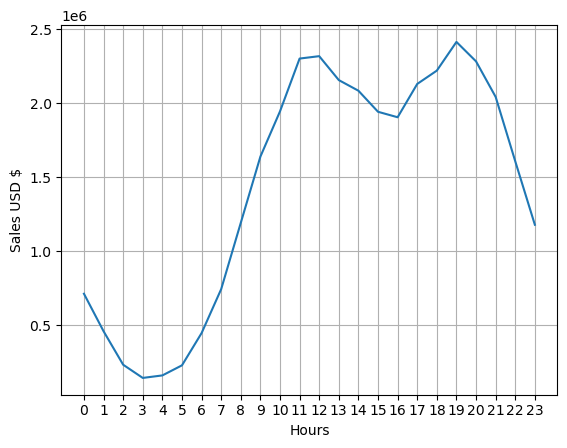

In [22]:
plt.plot(hours_sales.index, hours_sales['Sales'])
plt.xlabel('Hours')
plt.ylabel('Sales USD $')
plt.xticks(hours_sales.index[0:24])
plt.grid()
plt.show()

#### The chart shows us that at 11PM and 7 PM people tend to buy at those times so we can display the advertisment at those times to increase sales 


### Question 4: What products are most often sold together ?

In [23]:
all_data['Purchase Address'].nunique()

140787

In [24]:
# so to get if an item sold together with another item we can look at the order id if they have the same order id that means they sold togther
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,04,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,04,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,04,9,27


In [25]:
dup_id = all_data[all_data['Order ID'].duplicated(keep=False)]


In [26]:
dup_id['Together'] = dup_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup_id.head()

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\3579821724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_id['Together'] = dup_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour,Minute,Together
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,04,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,04,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,04,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA,04,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [27]:
dup_id = dup_id[['Order ID', 'Together']].drop_duplicates()
dup_id

,Order ID,Together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [28]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_id['Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What Product sold the most ? Why do you think it sold the most ?

In [29]:
items = all_data.groupby('Product').sum()#.sort_values(by ='Quantity Ordered',ascending = False)
items

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\2118965085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items = all_data.groupby('Product').sum()#.sort_values(by ='Quantity Ordered',ascending = False)


,Quantity Ordered,Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789


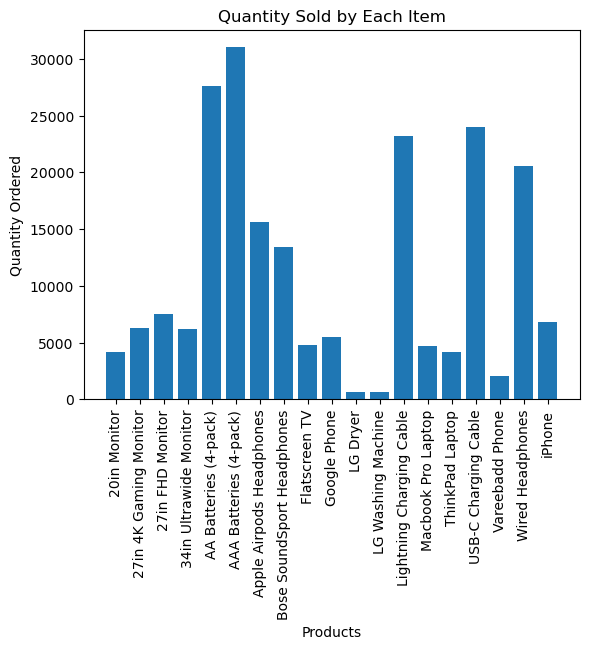

In [30]:
plt.bar(items.index, items['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Sold by Each Item')
plt.xticks(items.index, rotation='vertical', size=10)
plt.show()

In [31]:
item_price = all_data.groupby('Product').mean()
item_price

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\2296010098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_price = all_data.groupby('Product').mean()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,1.006828,109.99,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,1.002247,389.99,390.866382,14.593258,29.587640
27in FHD Monitor,1.005728,149.99,150.849141,14.325296,29.299054
34in Ultrawide Monitor,1.002912,379.99,381.096588,14.411260,29.684517
AA Batteries (4-pack),1.343004,3.84,5.157137,14.498809,29.598046
AAA Batteries (4-pack),1.502689,2.99,4.493040,14.404922,29.655201
Apple Airpods Headphones,1.007203,150.00,151.080455,14.361309,29.298990
Bose SoundSport Headphones,1.009906,99.99,100.980520,14.442402,29.463640
Flatscreen TV,1.003958,300.00,301.187500,14.336458,29.747708


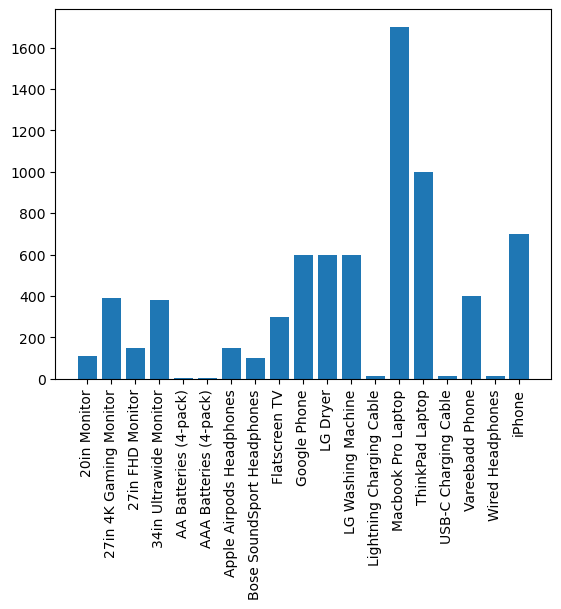

In [32]:
plt.bar(item_price.index, item_price['Price Each'])
plt.xticks(item_price.index, rotation='vertical', size=10)
plt.show()

C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\1660813069.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(items.index, rotation='vertical', size=8)
C:\Users\omar saad\AppData\Local\Temp\ipykernel_9320\1660813069.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


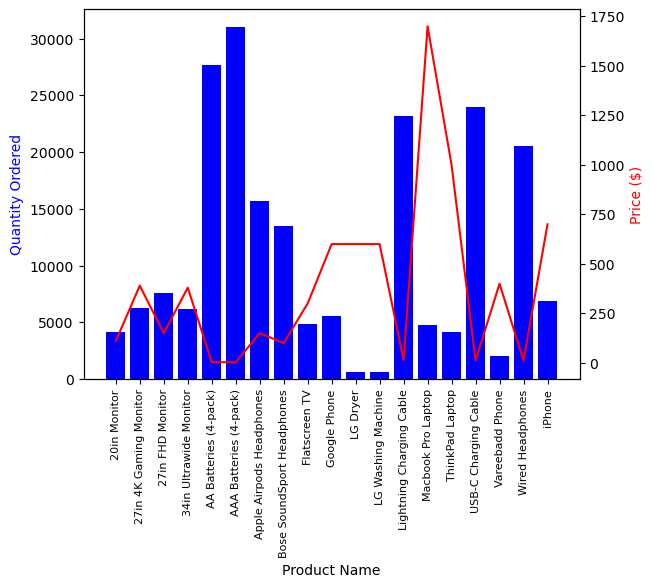

In [33]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(items.index, items['Quantity Ordered'], color='b')
ax2.plot(item_price.index, item_price['Price Each'], color='r')

ax1.set_xlabel('Product Name')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_ylabel('Quantity Ordered', color='b')

ax1.set_xticklabels(items.index, rotation='vertical', size=8)

fig.show()

#### we can see that the items that are cheaper is sold more than the items that are expensive